In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
x,y = make_circles(n_samples=750,factor=0.3,noise=0.1)

In [3]:
x

array([[ 0.32054644, -1.08631232],
       [ 0.22053064,  0.0145844 ],
       [-0.75547882,  0.67593917],
       ...,
       [-0.46160826, -0.67665082],
       [-0.4304934 ,  0.01157707],
       [-0.54214   ,  0.96341825]])

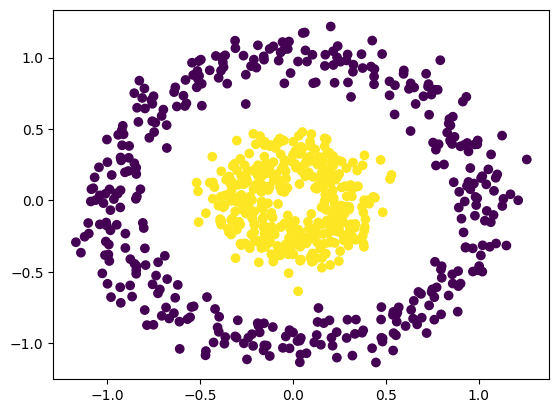

In [5]:
plt.scatter(x[:,0],x[:,1],c = y)

In [40]:
dbscan = DBSCAN(eps=0.1)

If eps is small, only very close points are grouped → more noise, many small clusters.
If eps is large, more points are grouped together → fewer clusters, less noise.
If eps = 0.5 → Each small group is treated as a separate cluster.

If eps = 2.0 → All points might be treated as one large cluster.

In [41]:
dbscan

DBSCAN(eps=0.1)

In [42]:
dbscan.fit(x)

DBSCAN(eps=0.1)

In [43]:
dbscan.fit_predict(x)

array([-1,  0,  1, -1,  8,  1,  0,  0,  0,  0,  2,  0,  2,  7,  0, -1,  3,
        4,  0,  0,  5,  0,  2, -1,  4,  0,  5,  0,  0,  5,  3,  6,  0,  0,
        0,  0,  0,  1,  0,  2,  0, -1,  0,  1,  0,  0,  2,  1,  1,  0,  0,
        1,  2,  2,  0,  0,  1,  0, -1,  0,  0,  0,  2, -1,  1,  0,  4,  0,
        0,  1,  4,  2,  0,  0,  0,  1,  4,  0,  0,  0,  1,  1,  0,  7,  1,
        4,  0,  0,  1,  0,  4,  0,  0,  0,  0,  1,  1,  2,  6,  0,  0,  0,
        4,  0,  2,  0,  0,  0,  1,  4,  0,  1,  2,  4,  0,  3,  0,  0,  0,
        1,  0, -1,  0,  2,  1,  0,  2,  2,  0,  1,  6,  1,  0,  0,  0,  0,
        4,  0,  0,  8,  0, -1,  0,  0,  0,  0, -1,  1,  0, -1,  0,  1,  4,
        0,  7,  1,  0,  4,  4,  0,  2,  7,  7,  4,  0,  0,  0,  0,  1,  4,
        2,  0,  6,  6,  4,  0,  0, -1,  0,  2,  0,  4,  0,  0,  1,  0,  0,
       -1,  1,  1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  2,  0,  3,
        4,  0,  1,  0,  0,  1,  1,  7,  0,  1,  1,  4,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  2

In [44]:
dbscan.labels_

array([-1,  0,  1, -1,  8,  1,  0,  0,  0,  0,  2,  0,  2,  7,  0, -1,  3,
        4,  0,  0,  5,  0,  2, -1,  4,  0,  5,  0,  0,  5,  3,  6,  0,  0,
        0,  0,  0,  1,  0,  2,  0, -1,  0,  1,  0,  0,  2,  1,  1,  0,  0,
        1,  2,  2,  0,  0,  1,  0, -1,  0,  0,  0,  2, -1,  1,  0,  4,  0,
        0,  1,  4,  2,  0,  0,  0,  1,  4,  0,  0,  0,  1,  1,  0,  7,  1,
        4,  0,  0,  1,  0,  4,  0,  0,  0,  0,  1,  1,  2,  6,  0,  0,  0,
        4,  0,  2,  0,  0,  0,  1,  4,  0,  1,  2,  4,  0,  3,  0,  0,  0,
        1,  0, -1,  0,  2,  1,  0,  2,  2,  0,  1,  6,  1,  0,  0,  0,  0,
        4,  0,  0,  8,  0, -1,  0,  0,  0,  0, -1,  1,  0, -1,  0,  1,  4,
        0,  7,  1,  0,  4,  4,  0,  2,  7,  7,  4,  0,  0,  0,  0,  1,  4,
        2,  0,  6,  6,  4,  0,  0, -1,  0,  2,  0,  4,  0,  0,  1,  0,  0,
       -1,  1,  1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  2,  0,  3,
        4,  0,  1,  0,  0,  1,  1,  7,  0,  1,  1,  4,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  2

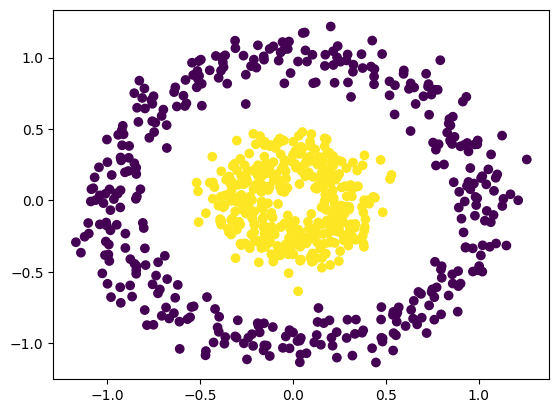

In [45]:
plt.scatter(x[:,0],x[:,1],c = y)

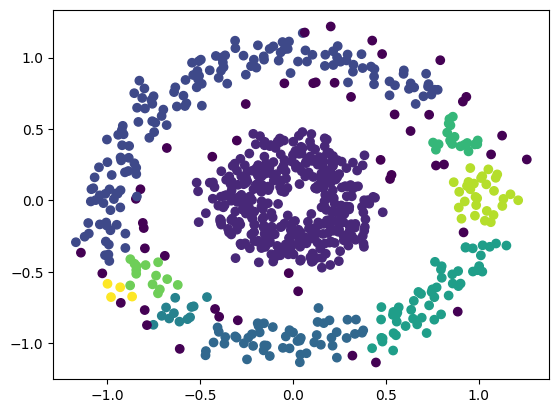

In [46]:
plt.scatter(x[:,0],x[:,1],c = dbscan.labels_)

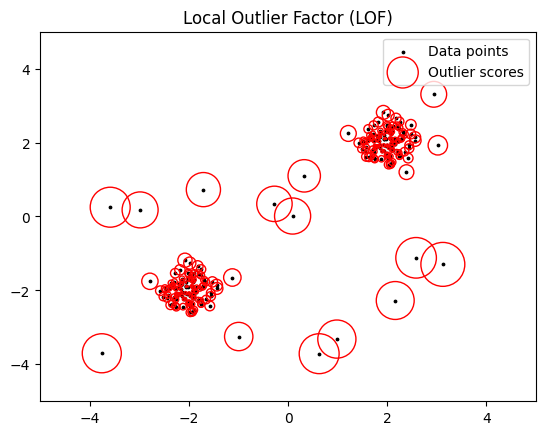

In [47]:
## Local outliers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate inlier and outlier data
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

# Fit LOF
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_

# Visualize
plt.scatter(X[:, 0], X[:, 1], color='k', s=3.0, label="Data points")
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors="r", facecolors="none", label="Outlier scores")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend()
plt.title("Local Outlier Factor (LOF)")
plt.show()
